#Group 17
#Modelling

In [1]:
import pandas as pd

# Load merged data
file_path = 'merged_data.csv'
df = pd.read_csv(file_path)

# Basic info
print("Shape:", df.shape)
print("Missing values:", df.isnull().sum().sum())
print("Duplicates:", df.duplicated().sum())
print("\nColumns:", df.columns.tolist())

# Quick look
df.head()


Shape: (17893, 28)
Missing values: 0
Duplicates: 0

Columns: ['course_id', 'course_type_broad', 'unit_id', 'unit_level_code', 'unit_level_name', 'unit_foe_detailed', 'unit_foe_narrow', 'foe_code', 'unit_foe_broad', 'eftsl_2024', 'funding_nation', 'funding_type', 'overload', 'funding_cluster', 'max_student_contrib_2024', 'commonwealth_contrib_2024', 'max_student_contrib_gf_2024', 'commonwealth_contrib_gf_2024', 'is_funding_cluster_variable', 'special_course_code', 'max_contrib_indicator', 'foe_detailed_title', 'foe_detailed', 'foe_narrow', 'foe_broad', 'foe_error', 'special_code', 'CSP_gov_payment']


,course_id,course_type_broad,unit_id,unit_level_code,unit_level_name,unit_foe_detailed,unit_foe_narrow,foe_code,unit_foe_broad,eftsl_2024,...,is_funding_cluster_variable,special_course_code,max_contrib_indicator,foe_detailed_title,foe_detailed,foe_narrow,foe_broad,foe_error,special_code,CSP_gov_payment
0,2951.0,Undergraduate,182243.0,0.0,Other,Mathematical Sciences,Mathematical Sciences,10100,Natural And Physical Sciences,0.500,...,No,No,No,Mathematical Sciences,Mathematical Sciences,Mathematical Sciences,NATURAL AND PHYSICAL SCIENCES,0.0,0.0,7457.500
1,2951.0,Undergraduate,213920.0,0.0,Other,Mathematical Sciences,Mathematical Sciences,10100,Natural And Physical Sciences,0.750,...,No,No,No,Mathematical Sciences,Mathematical Sciences,Mathematical Sciences,NATURAL AND PHYSICAL SCIENCES,0.0,0.0,11186.250
2,2951.0,Undergraduate,220770.0,0.0,Other,Mathematical Sciences,Mathematical Sciences,10100,Natural And Physical Sciences,0.500,...,No,No,No,Mathematical Sciences,Mathematical Sciences,Mathematical Sciences,NATURAL AND PHYSICAL SCIENCES,0.0,0.0,7457.500
3,2954.0,Undergraduate,182243.0,0.0,Other,Mathematical Sciences,Mathematical Sciences,10100,Natural And Physical Sciences,0.125,...,No,No,No,Mathematical Sciences,Mathematical Sciences,Mathematical Sciences,NATURAL AND PHYSICAL SCIENCES,0.0,0.0,1864.375
4,2976.0,Undergraduate,182243.0,0.0,Other,Mathematical Sciences,Mathematical Sciences,10100,Natural And Physical Sciences,0.250,...,No,No,No,Mathematical Sciences,Mathematical Sciences,Mathematical Sciences,NATURAL AND PHYSICAL SCIENCES,0.0,0.0,3728.750


# EDA

In [2]:
# Numerical summary
num_cols = df.select_dtypes(include=["float64", "int64"]).columns
df[num_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
course_id,17893.0,3489.144861,867.383320,0.0,2976.000,3055.00,3957.000,5132.0
unit_id,17893.0,221516.478791,31987.204606,0.0,213140.000,234148.00,236902.000,243990.0
unit_level_code,17893.0,2.769631,1.716857,0.0,1.000,2.00,4.000,8.0
foe_code,17893.0,60968.197060,34040.565814,10100.0,20300.000,80101.00,90999.000,129999.0
eftsl_2024,17893.0,1.268124,3.632795,0.0,0.125,0.25,0.875,97.0
overload,17893.0,0.091377,0.288152,0.0,0.000,0.00,0.000,1.0
max_student_contrib_2024,17893.0,10404.496898,4870.718245,0.0,8948.000,8948.00,16323.000,16323.0
commonwealth_contrib_2024,17893.0,11241.143129,8462.628593,0.0,1236.000,14915.00,18292.000,30395.0
max_student_contrib_gf_2024,17893.0,8292.384452,3106.164265,0.0,7659.000,8948.00,8948.000,12781.0
commonwealth_contrib_gf_2024,17893.0,13063.304980,7020.033324,0.0,7008.000,14915.00,18292.000,30395.0


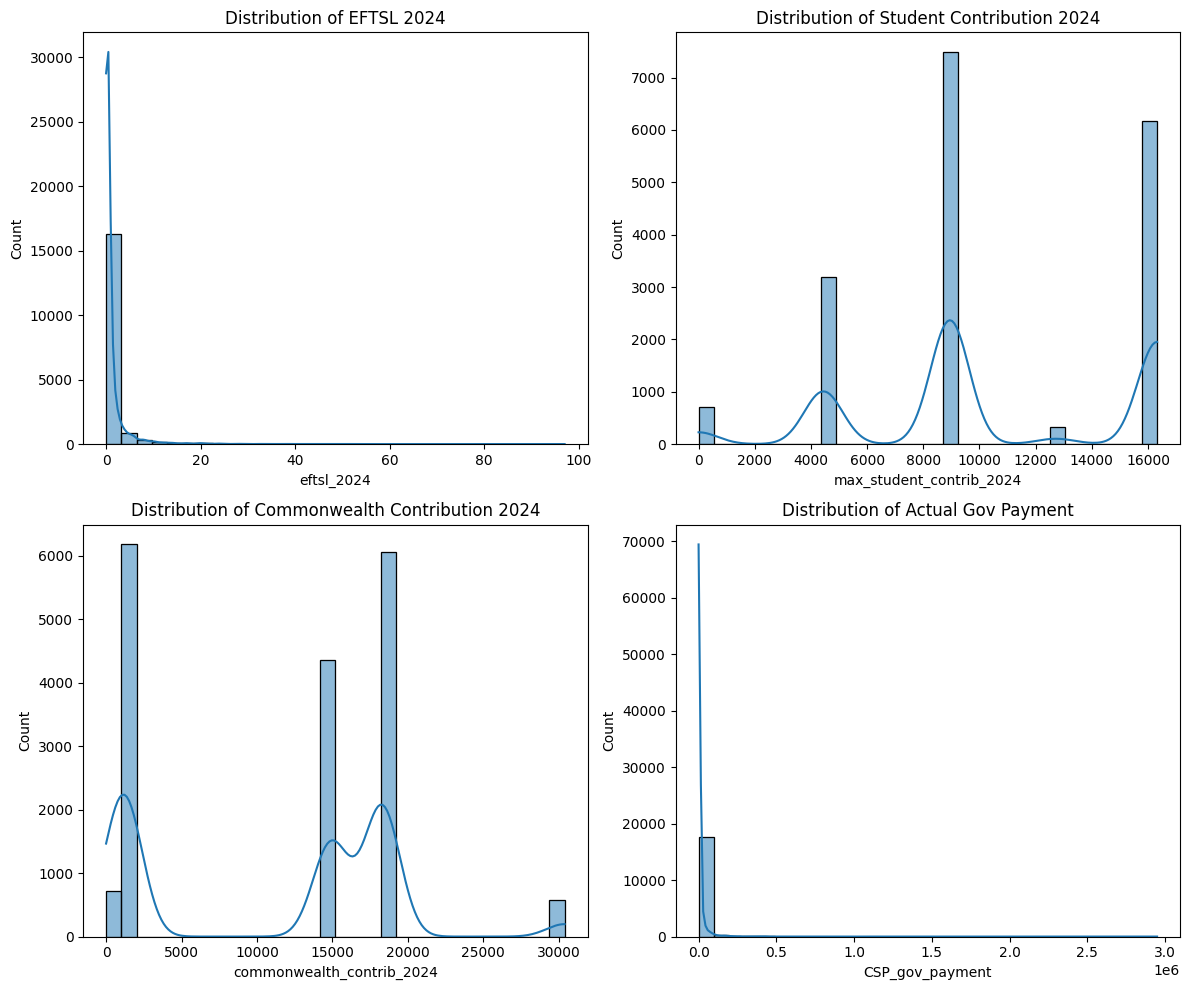

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
sns.histplot(df["eftsl_2024"], bins=30, kde=True)
plt.title("Distribution of EFTSL 2024")

plt.subplot(2,2,2)
sns.histplot(df["max_student_contrib_2024"], bins=30, kde=True)
plt.title("Distribution of Student Contribution 2024")

plt.subplot(2,2,3)
sns.histplot(df["commonwealth_contrib_2024"], bins=30, kde=True)
plt.title("Distribution of Commonwealth Contribution 2024")

plt.subplot(2,2,4)
sns.histplot(df["CSP_gov_payment"], bins=30, kde=True)
plt.title("Distribution of Actual Gov Payment")

plt.tight_layout()
plt.show()


Interpretation of Distributions

EFTSL 2024

Most values are between 0.1 and 1.0, as expected for student unit loads.

A few extreme outliers exist (up to ~100), which likely represent data anomalies or special cases.

Student Contribution 2024

Shows distinct peaks around $4,000, $9,000, and $16,000, which align with government-set fee bands.

Indicates structured fee categories rather than continuous variation.

Commonwealth Contribution 2024

Several clusters with peaks around $1,000, $15,000, $19,000, and $30,000, matching indexed government funding rates across disciplines.

Suggests strong discipline-based funding tiers.

Actual Government Payment (CSP Gov Payment)

Highly right-skewed distribution.

Most payments are relatively small, but a few outliers reach values in the millions, likely due to aggregated course-level allocations.

In [9]:
# Add ratio features
df["stud_share"] = df["max_student_contrib_2024"] / (df["max_student_contrib_2024"] + df["commonwealth_contrib_2024"])
df["gov_share"]  = df["commonwealth_contrib_2024"] / (df["max_student_contrib_2024"] + df["commonwealth_contrib_2024"])

# Check a few rows
df[["stud_share", "gov_share"]].head()


,stud_share,gov_share
0,0.229597,0.770403
1,0.229597,0.770403
2,0.229597,0.770403
3,0.229597,0.770403
4,0.229597,0.770403


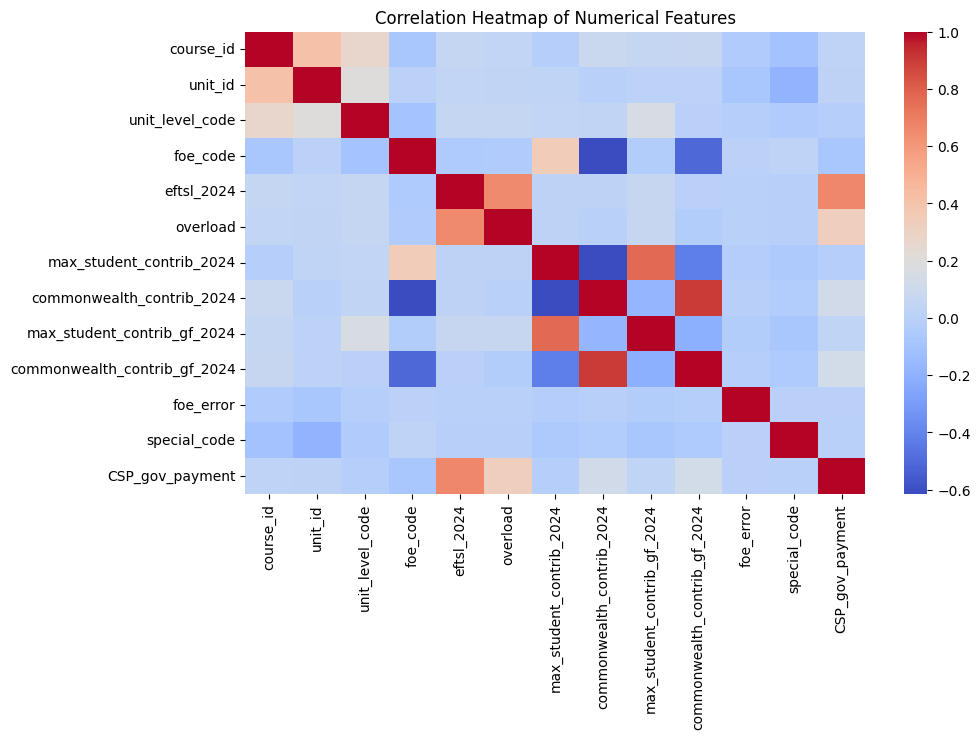

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


Interpretation of Correlation Heatmap

The heatmap shows the relationships among the numerical variables in the dataset:

Strong positive correlations are seen between:

eftsl_2024 and CSP_gov_payment → higher student load leads to higher government payments.

max_student_contrib_2024 and commonwealth_contrib_2024 → student and government contributions rise together across many courses.

Negative correlations are weaker but present, e.g., some FOE codes vs contributions, reflecting differences in discipline-based funding rules.

Most other features show low correlation, meaning they provide independent information.

In short: Student load (EFTSL) and funding contributions are the main drivers of government payments, while discipline codes influence funding patterns indirectly.

FOE Broad Summary:

                                                eftsl_2024  \
foe_broad                                                    
AGRICULTURE, ENVIRONMENTAL AND RELATED STUDIES    0.889842   
ENGINEERING AND RELATED TECHNOLOGIES              1.675533   
NATURAL AND PHYSICAL SCIENCES                     1.265769   
HEALTH                                            1.907648   
EDUCATION                                         0.991803   
ARCHITECTURE AND BUILDING                         1.063048   
INFORMATION TECHNOLOGY                            2.262644   
CREATIVE ARTS                                     0.812292   
SOCIETY AND CULTURE                               0.828619   
MIXED FIELD PROGRAMMES                            0.534314   
FOOD, HOSPITALITY AND PERSONAL SERVICES           0.000000   
MANAGEMENT AND COMMERCE                           1.783862   
0                                                 1.579681   

                                                m

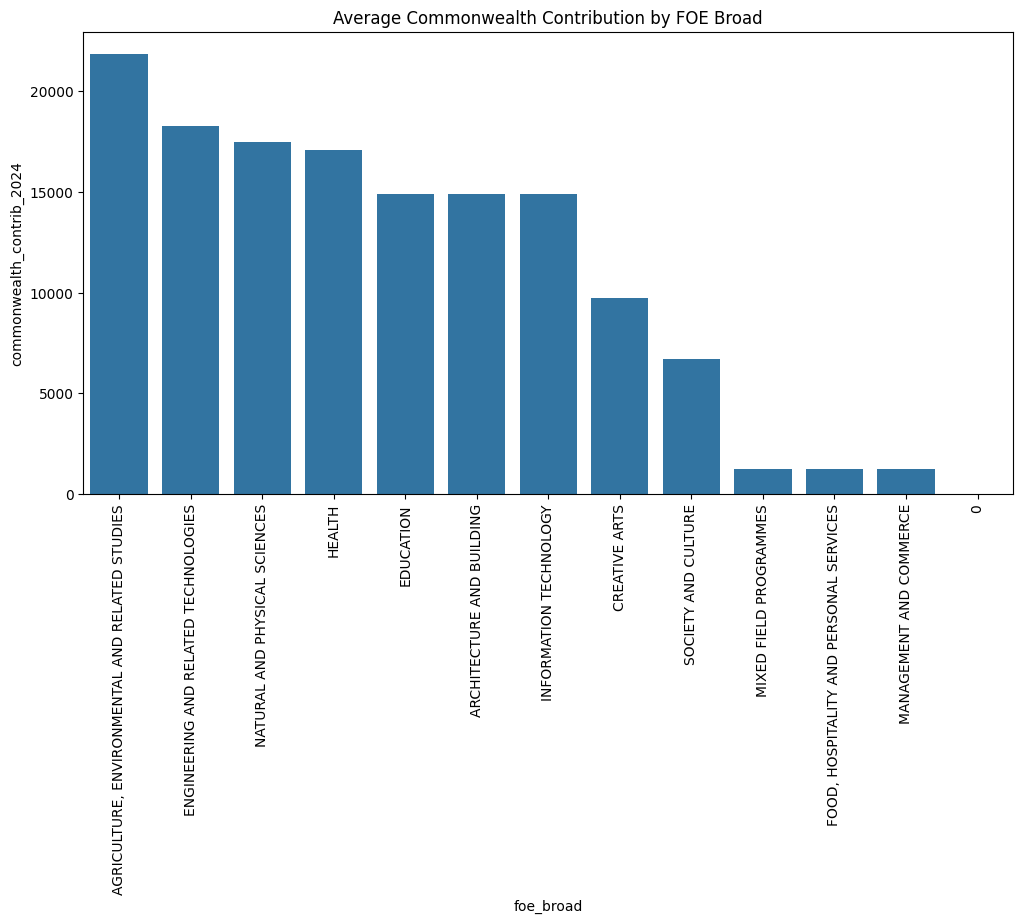

In [10]:
# Average contributions by FOE broad field
foe_summary = df.groupby("foe_broad")[["eftsl_2024",
                                        "max_student_contrib_2024",
                                        "commonwealth_contrib_2024",
                                        "CSP_gov_payment"]].mean().sort_values("commonwealth_contrib_2024", ascending=False)

print("FOE Broad Summary:\n")
print(foe_summary)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=foe_summary.reset_index(), x="foe_broad", y="commonwealth_contrib_2024")
plt.xticks(rotation=90)
plt.title("Average Commonwealth Contribution by FOE Broad")
plt.show()


Funding Cluster Summary:

                   eftsl_2024  max_student_contrib_2024  \
funding_cluster                                           
Funding Cluster 4    2.996690               9474.732297   
Funding Cluster 3    1.055527               7939.987628   
Funding Cluster 2    1.324807               7266.218858   
Funding Cluster 1    1.238788              16323.000000   
0                    1.579681                  0.000000   

                   commonwealth_contrib_2024  CSP_gov_payment  
funding_cluster                                                
Funding Cluster 4                    30395.0     56918.443437  
Funding Cluster 3                    18292.0     12477.304520  
Funding Cluster 2                    14915.0     11000.862268  
Funding Cluster 1                     1236.0      4029.357282  
0                                        0.0         0.000000  


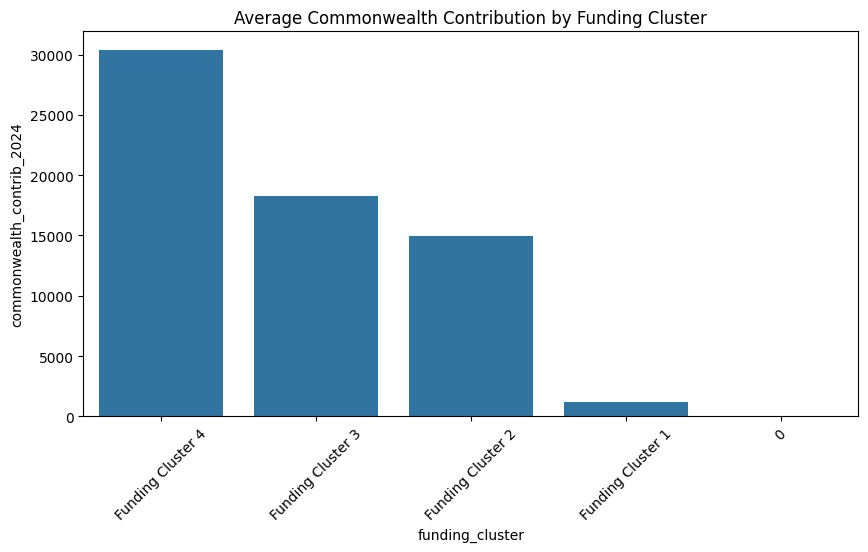

In [11]:
# Average contributions by Funding Cluster
cluster_summary = df.groupby("funding_cluster")[["eftsl_2024",
                                                 "max_student_contrib_2024",
                                                 "commonwealth_contrib_2024",
                                                 "CSP_gov_payment"]].mean().sort_values("commonwealth_contrib_2024", ascending=False)

print("Funding Cluster Summary:\n")
print(cluster_summary)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(data=cluster_summary.reset_index(), x="funding_cluster", y="commonwealth_contrib_2024")
plt.xticks(rotation=45)
plt.title("Average Commonwealth Contribution by Funding Cluster")
plt.show()


Student vs Government Share by FOE:

                                                stud_share  gov_share
foe_broad                                                            
EDUCATION                                         0.229597   0.770403
AGRICULTURE, ENVIRONMENTAL AND RELATED STUDIES    0.269243   0.730757
NATURAL AND PHYSICAL SCIENCES                     0.304324   0.695676
ENGINEERING AND RELATED TECHNOLOGIES              0.328488   0.671512
INFORMATION TECHNOLOGY                            0.374974   0.625026
ARCHITECTURE AND BUILDING                         0.374974   0.625026
HEALTH                                            0.436530   0.563470
CREATIVE ARTS                                     0.585956   0.414044
SOCIETY AND CULTURE                               0.686062   0.313938
FOOD, HOSPITALITY AND PERSONAL SERVICES           0.929609   0.070391
MIXED FIELD PROGRAMMES                            0.929609   0.070391
MANAGEMENT AND COMMERCE                           0.9

<Figure size 1200x600 with 0 Axes>

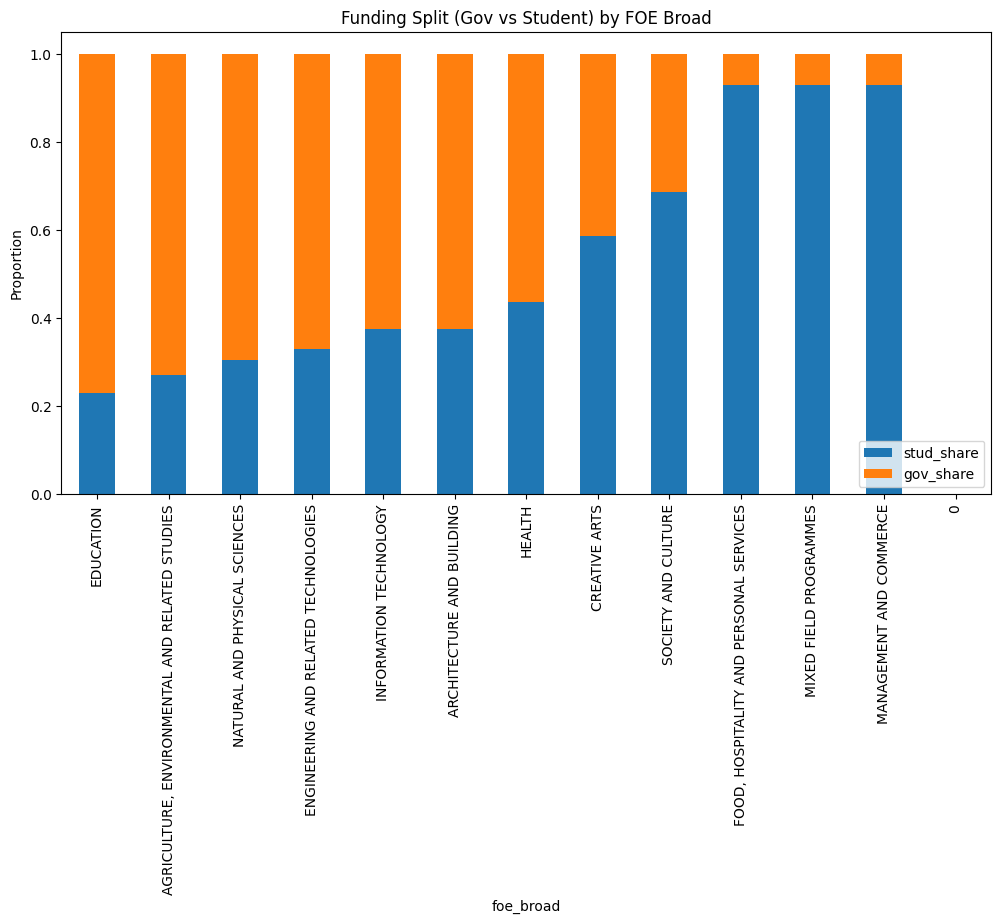

In [12]:
# Student vs Government share by FOE
share_summary = df.groupby("foe_broad")[["stud_share", "gov_share"]].mean().sort_values("gov_share", ascending=False)

print("Student vs Government Share by FOE:\n")
print(share_summary)

# Plot
plt.figure(figsize=(12,6))
share_summary.plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Funding Split (Gov vs Student) by FOE Broad")
plt.ylabel("Proportion")
plt.xticks(rotation=90)
plt.show()


# Modelling

## 1: Anomaly Detection (Financial Integrity)

## Logistic Regression for Anomaly Detection

### Objective

Logistic Regression to:

* Frame anomaly detection as a binary classification problem (normal vs anomaly).

* Provide an interpretable statistical model where coefficients indicate which features make anomalies more likely.


### Methodology

Target variable (y):

We defined anomalies using the rule-based method (absolute difference > $500 between expected and actual government payment).

This gave us a binary flag:

* 0 = Normal

* 1 = Anomaly.

Features (X):

* eftsl_2024 (Equivalent Full-Time Student Load).

* max_student_contrib_2024 (maximum student contribution rate).

* commonwealth_contrib_2024 (government contribution rate).

* funding_cluster, unit_level_code, course_type_broad (categorical descriptors of course).

Preprocessing:

* Standardized numeric variables.

* One-hot encoded categorical variables.

Model:

Logistic Regression with class balancing (class_weight="balanced") to handle imbalance between anomalies and normal records.

Trained on 80% of the dataset, tested on 20%.

Anomalies: 7834 out of 17893

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.65      0.68      2009
           1       0.60      0.68      0.64      1570

    accuracy                           0.66      3579
   macro avg       0.66      0.66      0.66      3579
weighted avg       0.67      0.66      0.66      3579



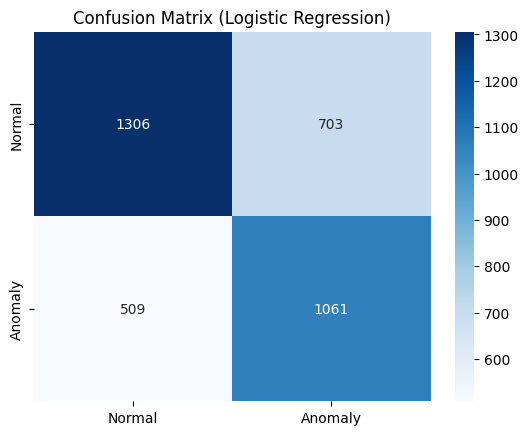

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/merged_data.csv")

# ---- Step 1: Create anomaly flag (if not already done) ----
# Example: absolute rule-based anomalies (> $500 diff)
df["expected_gov_payment"] = df["commonwealth_contrib_2024"] * df["eftsl_2024"]
df["gov_payment_diff"] = abs(df["CSP_gov_payment"] - df["expected_gov_payment"])
df["anomaly_flag"] = (df["gov_payment_diff"] > 500).astype(int)

print("Anomalies:", df["anomaly_flag"].sum(), "out of", len(df))

# ---- Step 2: Define features and target ----
X = df[["eftsl_2024", "max_student_contrib_2024", "commonwealth_contrib_2024",
        "funding_cluster", "unit_level_code", "course_type_broad"]]
y = df["anomaly_flag"]

categorical = ["funding_cluster", "unit_level_code", "course_type_broad"]
numeric = ["eftsl_2024", "max_student_contrib_2024", "commonwealth_contrib_2024"]

# ---- Step 3: Preprocessing ----
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical),
        ("num", StandardScaler(), numeric)
    ])

# ---- Step 4: Logistic Regression model ----
log_reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, class_weight="balanced"))
])

# ---- Step 5: Train-test split ----
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# ---- Step 6: Evaluation ----
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Normal", "Anomaly"],
            yticklabels=["Normal", "Anomaly"])
plt.title("Confusion Matrix (Logistic Regression)")
plt.show()


## Confusion Matrix:

True positives (1,061 anomalies correctly identified).

False negatives (509 anomalies missed).

False positives (703 normal cases incorrectly flagged).

True negatives (1,306 correctly identified normal cases).

### Interpretation:  The model captured many anomalies but also generated false alarms and missed some true anomalies.

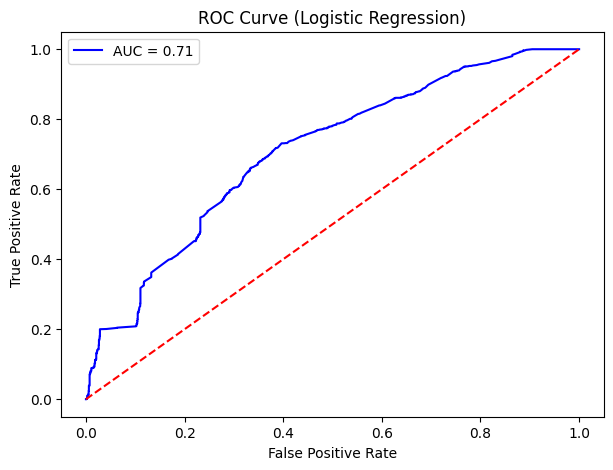

In [59]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predicted probabilities
y_proba = log_reg.predict_proba(X_test)[:,1]

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color="blue", label=f"AUC = {auc_score:.2f}")
plt.plot([0,1],[0,1], color="red", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Logistic Regression)")
plt.legend()
plt.show()


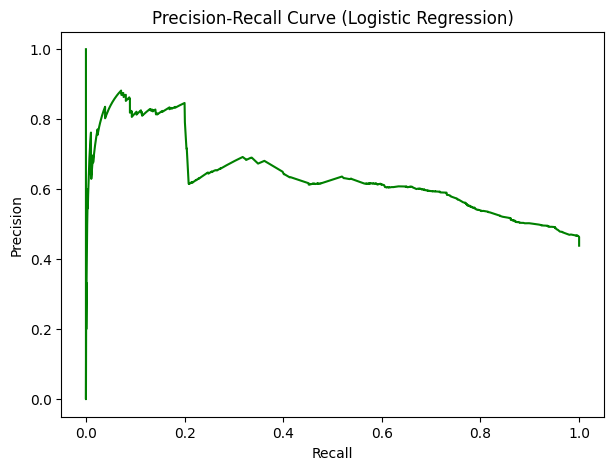

In [60]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(7,5))
plt.plot(recall, precision, color="green")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Logistic Regression)")
plt.show()


/tmp/ipython-input-1921603135.py:17: UserWarning: Mismatched number of handles and labels: len(handles) = 3 len(labels) = 2
  plt.legend(handles=handles, labels=["Normal", "Anomaly"], title="Status")


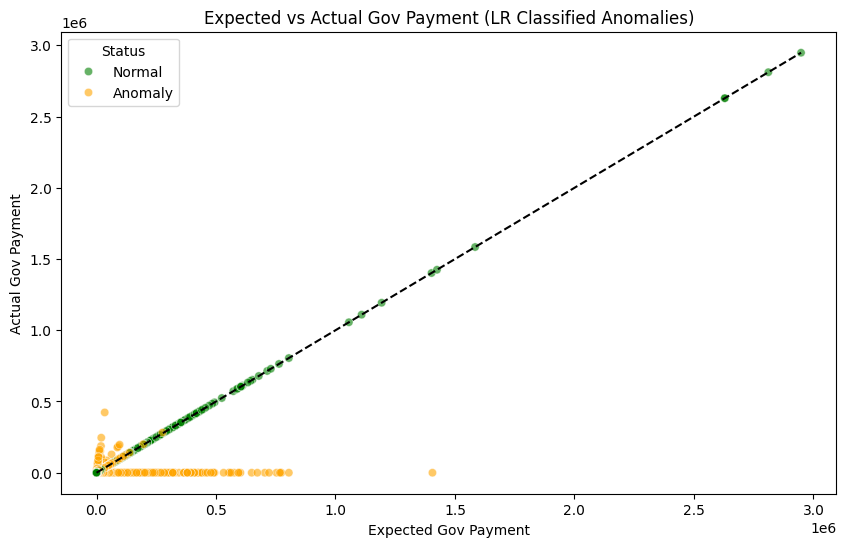

In [65]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x="expected_gov_payment",
    y="CSP_gov_payment",
    hue="anomaly_flag",    # use actual column, not remapped
    palette={0:"green", 1:"orange"},  # 0=Normal, 1=Anomaly
    alpha=0.6
)

plt.plot([0, df["expected_gov_payment"].max()],
         [0, df["expected_gov_payment"].max()],
         color="black", linestyle="--", label="Perfect Match")

# Adjust legend labels
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=["Normal", "Anomaly"], title="Status")

plt.title("Expected vs Actual Gov Payment (LR Classified Anomalies)")
plt.xlabel("Expected Gov Payment")
plt.ylabel("Actual Gov Payment")
plt.show()


/tmp/ipython-input-3303283504.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["anomaly_flag"], y=df["gov_payment_diff"], palette="Set2")


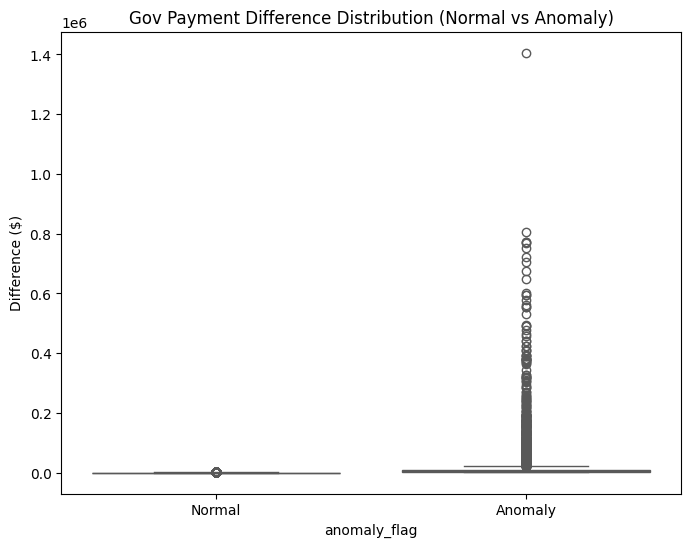

In [63]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df["anomaly_flag"], y=df["gov_payment_diff"], palette="Set2")
plt.xticks([0,1], ["Normal","Anomaly"])
plt.title("Gov Payment Difference Distribution (Normal vs Anomaly)")
plt.ylabel("Difference ($)")
plt.show()


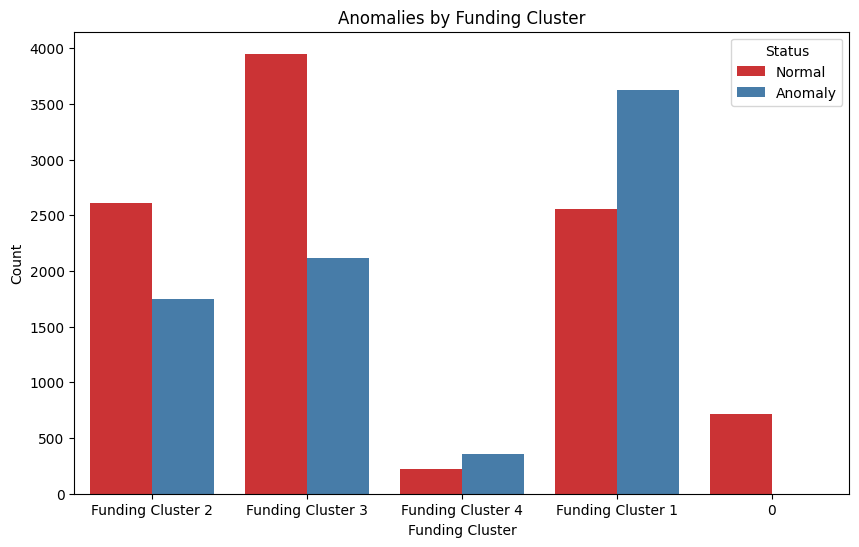

In [64]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="funding_cluster", hue="anomaly_flag", palette="Set1")
plt.title("Anomalies by Funding Cluster")
plt.xlabel("Funding Cluster")
plt.ylabel("Count")
plt.legend(title="Status", labels=["Normal","Anomaly"])
plt.show()


## Forecast

###What we are forecasting

We are predicting the Commonwealth Supported Place (CSP) Government Payment (CSP_gov_payment) for each course/unit.

This value represents the actual dollar amount the government contributes for a student’s enrolment, based on:

Equivalent Full-Time Student Load (EFTSL)

Indexed government contribution rates

Student contribution rates

Funding cluster / field of education

####How we did it

Prepared data

*   Features (predictors):
* ftsl_2024 (student load per unit)
* max_student_contrib_2024 (student contribution rate)

* commonwealth_contrib_2024 (gov contribution rate)

* funding_cluster, unit_level_code, course_type_broad (categorical descriptors)

Target: CSP_gov_payment (actual gov payment recorded).

Random Forest Forecasting Results:
 MAE: 5612.402293800154
 RMSE: 23892.209417009195
 R²: 0.9113047471298334


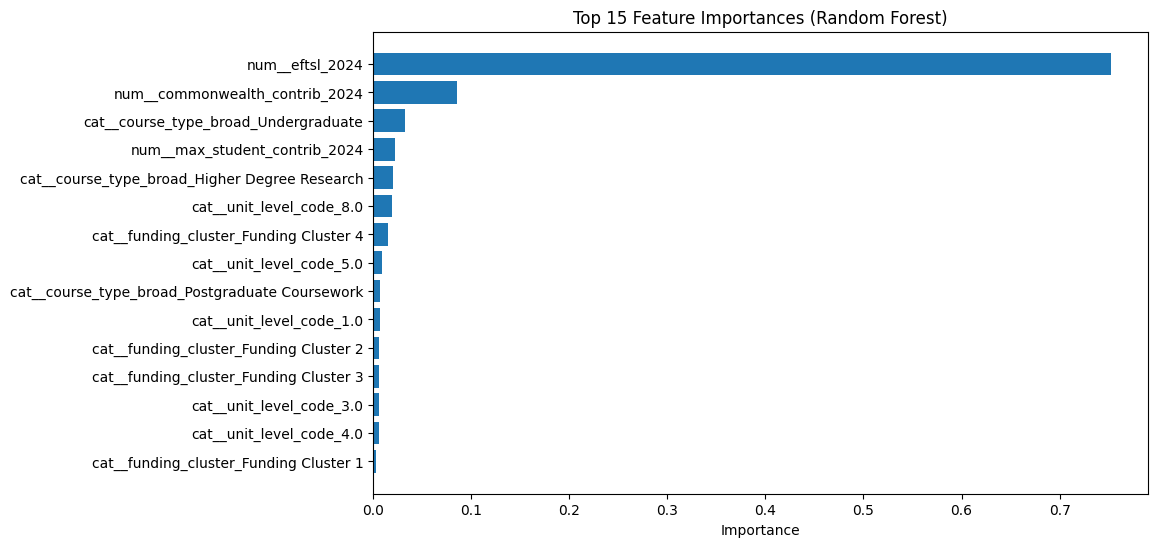

In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/merged_data.csv")

# Features (X) and Target (y)
X = df[["eftsl_2024", "max_student_contrib_2024", "commonwealth_contrib_2024",
        "funding_cluster", "unit_level_code", "course_type_broad"]]
y = df["CSP_gov_payment"]

# Categorical & numeric columns
categorical = ["funding_cluster", "unit_level_code", "course_type_broad"]
numeric = ["eftsl_2024", "max_student_contrib_2024", "commonwealth_contrib_2024"]

# Preprocessing: one-hot encode categoricals, pass numeric through
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical),
        ("num", "passthrough", numeric)
    ])

# Split train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Random Forest pipeline
rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(
        n_estimators=300,      # number of trees
        max_depth=None,        # let trees expand fully
        random_state=42,
        n_jobs=-1
    ))
])

# Train model
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate performance
print("Random Forest Forecasting Results:")
print(" MAE:", mean_absolute_error(y_test, y_pred))
print(" RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print(" R²:", r2_score(y_test, y_pred))

# Feature importance
rf = rf_model.named_steps["regressor"]
encoded_features = rf_model.named_steps["preprocessor"].get_feature_names_out()
importances = rf.feature_importances_

feat_imp = pd.DataFrame({"feature": encoded_features, "importance": importances})
feat_imp = feat_imp.sort_values(by="importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(feat_imp["feature"][:15], feat_imp["importance"][:15])
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.show()


Preprocessing

* One-hot encoded categorical variables (funding cluster, course type, level).

* Left numeric features as-is.




###Modelling

* Split data into training (80%) and testing (20%).

* Trained a Random Forest Regressor with 300 trees.

Random Forest was chosen because it captures non-linear relationships between course characteristics and funding.

###Evaluation

Metrics:

MAE (~5.6k) → average prediction error in dollars.

RMSE (~24.5k) → measures extreme errors.

R² (~0.91) → explains 91% of variation in CSP payments.

## Insight

Feature importance analysis shows which factors most strongly drive CSP funding (likely EFTSL and government contribution rate dominate).

This helps identify the most influential drivers of government payments across courses.

# Clustering

Here the goal is segmentation → to group courses/units by their funding & payment structure, so UWA can identify:

Gov-heavy funded courses (high government share, low student share).

Student-heavy funded courses (high student share, low government share).

Balanced courses.

🔹 Clustering Plan
Features for Clustering

We want to use ratios, not absolute amounts, because some courses naturally have larger payments.

stud_share = proportion of total cost covered by students

gov_share = proportion of total cost covered by government



eftsl_2024 = student load (to capture intensity).

## Results
Cluster 0 (6,038 courses) (STUDENT HEAVY)

* Likely student-heavy funded: student share is high, government share is low.

* These are courses where students bear most of the cost (e.g., Law, Business, Arts — based on Australian HE funding structure).

Cluster 1 (10,672 courses) (GOVT HEAVY)

* Likely gov-heavy funded: government share dominates.

* These are courses where the government contributes most (e.g., Medicine, Nursing, STEM).

Cluster 2 (260 courses)(BALANCED/OUTLIERS)

Very small cluster → possibly outliers / balanced cases.

These are “special” cases with unusual funding splits (e.g., flagged FOE codes, variable cluster funding).

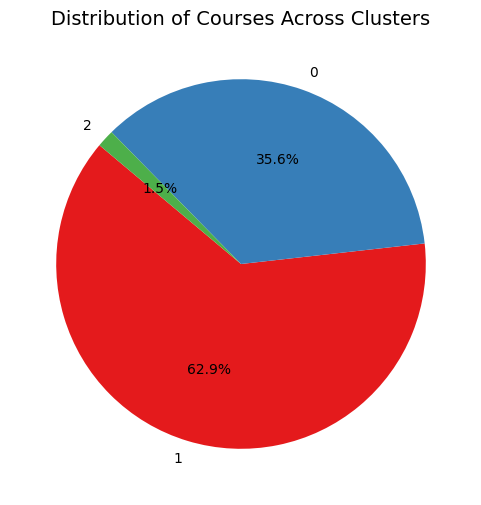

In [43]:
cluster_counts = df["cluster"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%',
        startangle=140, colors=sns.color_palette("Set1", len(cluster_counts)))
plt.title("Distribution of Courses Across Clusters", fontsize=14)
plt.show()


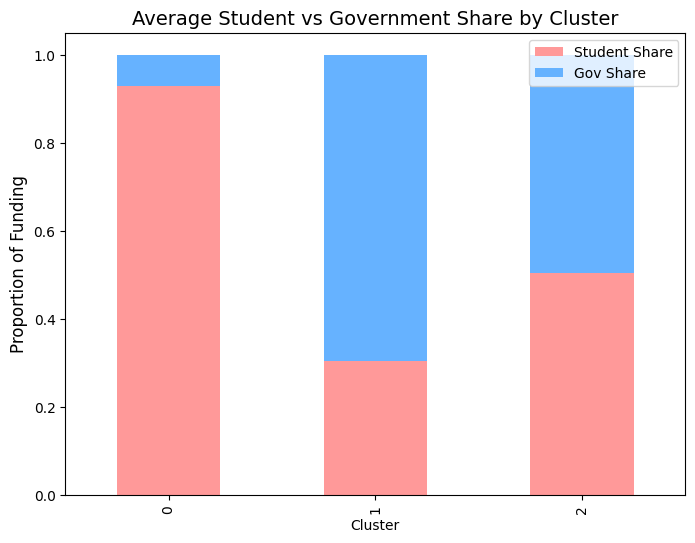

In [44]:
avg_shares = df.groupby("cluster")[["stud_share", "gov_share"]].mean()

avg_shares.plot(kind="bar", stacked=True, figsize=(8,6),
                color=["#FF9999", "#66B2FF"])
plt.title("Average Student vs Government Share by Cluster", fontsize=14)
plt.ylabel("Proportion of Funding", fontsize=12)
plt.xlabel("Cluster")
plt.legend(["Student Share", "Gov Share"])
plt.show()



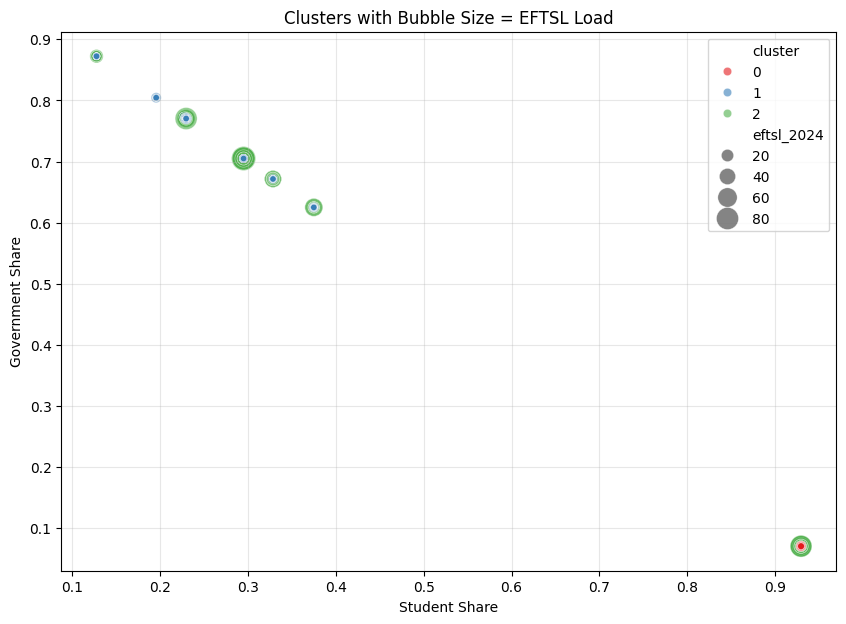

In [45]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=df, x="stud_share", y="gov_share",
    hue="cluster", size="eftsl_2024",
    sizes=(20, 300), alpha=0.6, palette="Set1"
)

plt.title("Clusters with Bubble Size = EFTSL Load")
plt.xlabel("Student Share")
plt.ylabel("Government Share")
plt.grid(alpha=0.3)
plt.show()


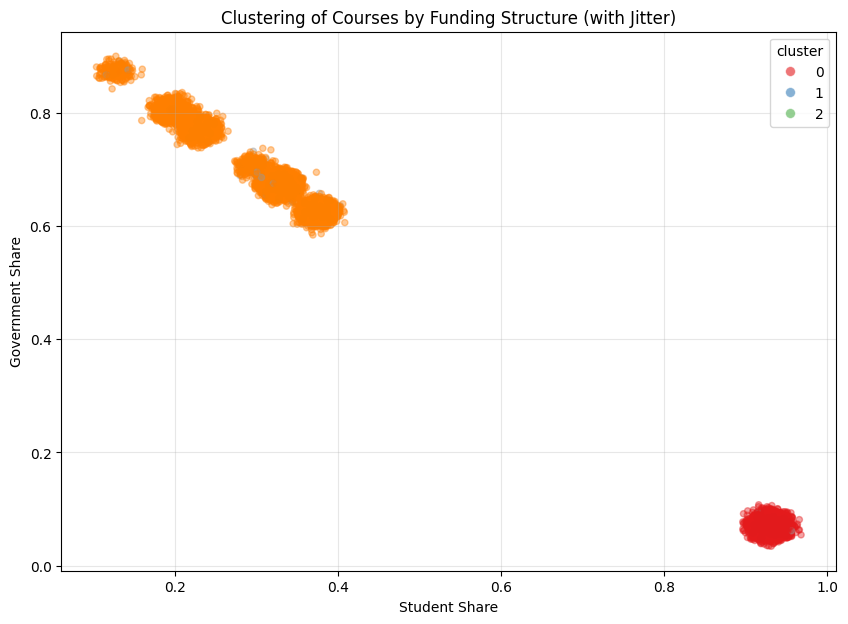

In [47]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=df,
    x="stud_share",
    y="gov_share",
    hue="cluster",
    palette="Set1",
    alpha=0.6,
    s=50
)

# Add jitter effect
plt.scatter(
    df["stud_share"] + np.random.normal(0, 0.01, len(df)),
    df["gov_share"] + np.random.normal(0, 0.01, len(df)),
    c=df["cluster"], cmap="Set1", alpha=0.4, s=20
)

plt.title("Clustering of Courses by Funding Structure (with Jitter)")
plt.xlabel("Student Share")
plt.ylabel("Government Share")
plt.grid(alpha=0.3)
plt.show()
